In [23]:
import pandas as pd
import joblib
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/team_features.csv')
df.head()

,date,team,opponent,team_score,opponent_score,win,neutral,avg_goals_last_5,win_rate_last_5,avg_goals_conceded_last_5,goal_diff,avg_goal_diff_last_5,days_since_last_match
0,2010-01-02,Iran,North Korea,1.0,0.0,1,True,NaN,NaN,NaN,1.0,NaN,NaN
1,2010-01-02,Mali,Qatar,0.0,0.0,0,False,NaN,NaN,NaN,0.0,NaN,NaN
2,2010-01-02,North Korea,Iran,0.0,1.0,0,True,NaN,NaN,NaN,-1.0,NaN,NaN
3,2010-01-02,Qatar,Mali,0.0,0.0,0,False,NaN,NaN,NaN,0.0,NaN,NaN
4,2010-01-02,Syria,Zimbabwe,6.0,0.0,1,True,NaN,NaN,NaN,6.0,NaN,NaN


In [3]:
latest_features = df.sort_values(by="date").groupby("team").tail(1).set_index("team")
latest_features

,date,opponent,team_score,opponent_score,win,neutral,avg_goals_last_5,win_rate_last_5,avg_goals_conceded_last_5,goal_diff,avg_goal_diff_last_5,days_since_last_match
team,,,,,,,,,,,,
Rhodes,2011-06-27,Jersey,0.0,2.0,0,True,2.000000,1.0,1.000000,-2.0,1.000000,1.0
Kiribati,2011-09-05,Tahiti,1.0,17.0,0,True,0.333333,0.0,9.666667,-16.0,-9.333333,2.0
Cilento,2011-12-29,Occitania,0.0,2.0,0,False,NaN,NaN,NaN,-2.0,NaN,NaN
Western Sahara,2012-06-09,Occitania,1.0,3.0,0,True,2.500000,0.5,3.250000,-2.0,-0.750000,1.0
Saint Pierre and Miquelon,2012-09-28,New Caledonia,1.0,16.0,0,True,0.200000,0.0,10.200000,-15.0,-10.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Dominican Republic,2025-11-18,Martinique,0.0,0.0,0,False,0.600000,0.2,1.200000,0.0,-0.600000,6.0
Hong Kong,2025-11-18,Singapore,1.0,2.0,0,False,3.000000,0.4,1.400000,-1.0,1.600000,5.0
Zambia,2025-11-18,Angola,2.0,3.0,0,False,0.400000,0.2,2.200000,-1.0,-1.800000,3.0


In [4]:
FEATURES = ["avg_goals_last_5", "win_rate_last_5", "neutral", "avg_goals_conceded_last_5", "avg_goal_diff_last_5"]

latest_features = latest_features.dropna(subset=FEATURES + ["win"]).copy()

In [5]:
model = joblib.load('soccer_model.pkl')
scaler = joblib.load('soccer_scaler.pkl')

In [6]:
teams = latest_features.index.tolist()  # all teams in simulation
teams

['Rhodes',
 'Kiribati',
 'Western Sahara',
 'Saint Pierre and Miquelon',
 'Provence',
 'Brittany',
 'Darfur',
 'Arameans Suryoye',
 'Sealand',
 'Occitania',
 'County of Nice',
 'Romani people',
 'Galicia',
 'Iraqi Kurdistan',
 'Délvidék',
 'Monaco',
 'Corsica',
 'Felvidék',
 'Saare County',
 'Gotland',
 'Donetsk PR',
 'Ellan Vannin',
 'United Koreans in Japan',
 'Northern Cyprus',
 'Kabylia',
 'Kárpátalja',
 'Vatican City',
 'Catalonia',
 'Somaliland',
 'Cascadia',
 'Barawa',
 'Yorkshire',
 'Parishes of Jersey',
 'Padania',
 'Abkhazia',
 'Artsakh',
 'Western Armenia',
 'Franconia',
 'Eritrea',
 'Luhansk PR',
 'South Ossetia',
 'Chagos Islands',
 'Panjab',
 'Basque Country',
 'Alderney',
 'Yoruba Nation',
 'Biafra',
 'Matabeleland',
 'Mapuche',
 'Maule Sur',
 'Aymara',
 'Saint Barthélemy',
 'Chameria',
 'Székely Land',
 'Two Sicilies',
 'Saint Helena',
 'Menorca',
 'Åland Islands',
 'Guernsey',
 'Greenland',
 'Falkland Islands',
 'Isle of Wight',
 'Kernow',
 'Sápmi',
 'Raetia',
 'Tibet'

In [12]:
def simulate_match(team_a, team_b, team_table, model):
  row_a = team_table.loc[team_a]
  row_b = team_table.loc[team_b]

  feature_values = {
    "avg_goals_last_5": row_a["avg_goals_last_5"] - row_b["avg_goals_last_5"],
    "win_rate_last_5": row_a["win_rate_last_5"] - row_b["win_rate_last_5"],
    "neutral": 1, # Neutral is a constant feature and should be handled accordingly
    "avg_goals_conceded_last_5": row_a["avg_goals_conceded_last_5"] - row_b["avg_goals_conceded_last_5"],
    "avg_goal_diff_last_5": row_a["avg_goal_diff_last_5"] - row_b["avg_goal_diff_last_5"]
  }

  # Ensure the feature_diff DataFrame has columns in the same order as FEATURES
  # FEATURES list is defined as: ['avg_goals_last_5', 'win_rate_last_5', 'neutral', 'avg_goals_conceded_last_5', 'avg_goal_diff_last_5']
  X = pd.DataFrame([feature_values], columns=FEATURES)
  X_scaled = scaler.transform(X)
  win_prob = model.predict_proba(X)[0, 1]
  winner = team_a if np.random.rand() < win_prob else team_b
  print(f"{'MATCHUP':<35} | {'WINNER':<15} | {'WIN PROB'}")
  print("-" * 65)

  # Example of how to print inside your loop
  # Assuming you have: team_a, team_b, winner, win_prob
  match_str = f"{team_a} vs {team_b}"
  print(f"{match_str:<35} | {winner:<15} | {win_prob:.2%}")
  return winner

In [13]:
def simulate_round(teams, team_table, model):
    """
    Simulate one knockout round.
    teams: list of team names
    Returns list of winners
    """
    np.random.shuffle(teams)
    winners = []

    for i in range(0, len(teams), 2):
        team_a = teams[i]
        team_b = teams[i+1]
        winner = simulate_match(team_a, team_b, team_table, model)
        winners.append(winner)

    return winners

In [14]:
def simulate_tournament(teams, team_table, model):
    round_teams = teams.copy()
    while len(round_teams) > 1:
        print("\n" + "="*40)
        print(f"Knockout ROUND")
        print("="*40)
        round_teams = simulate_round(round_teams, team_table, model)
    return round_teams[0]  # champion

In [15]:
world_cup_teams = [
    "Spain", "Argentina", "France", "England",
    "Brazil", "Portugal", "Netherlands", "Belgium",
    "Germany", "Croatia", "Morocco", "Italy",
    "Colombia", "United States", "Mexico", "Uruguay"
]
worldcup_winner = simulate_tournament(world_cup_teams, latest_features, model)

print("\n" + "="*40)
print(f"🏆 THE WINNER OF THE 2026 WORLD CUP IS: {worldcup_winner.upper()} 🏆")
print("="*40)


Knockout ROUND
MATCHUP                             | WINNER          | WIN PROB
-----------------------------------------------------------------
Netherlands vs Colombia             | Netherlands     | 35.09%
MATCHUP                             | WINNER          | WIN PROB
-----------------------------------------------------------------
Spain vs Portugal                   | Spain           | 55.31%
MATCHUP                             | WINNER          | WIN PROB
-----------------------------------------------------------------
Uruguay vs France                   | France          | 32.29%
MATCHUP                             | WINNER          | WIN PROB
-----------------------------------------------------------------
Argentina vs England                | England         | 28.44%
MATCHUP                             | WINNER          | WIN PROB
-----------------------------------------------------------------
Mexico vs Brazil                    | Brazil          | 24.47%
MATCHUP       

In [16]:
world_cup_teams = [
    "Spain", "Argentina", "France", "England",
    "Brazil", "Portugal", "Netherlands", "Belgium",
    "Germany", "Croatia", "Morocco", "Italy",
    "Colombia", "United States", "Mexico", "Uruguay"
]
winners_list = []

for i in range(10000):
    worldcup_winner = simulate_tournament(world_cup_teams, latest_features, model)
    winners_list.append(worldcup_winner)

Streaming output truncated to the last 5000 lines.
Knockout ROUND
MATCHUP                             | WINNER          | WIN PROB
-----------------------------------------------------------------
England vs France                   | France          | 46.24%
MATCHUP                             | WINNER          | WIN PROB
-----------------------------------------------------------------
Morocco vs Portugal                 | Morocco         | 44.66%
MATCHUP                             | WINNER          | WIN PROB
-----------------------------------------------------------------
Italy vs Germany                    | Italy           | 44.01%
MATCHUP                             | WINNER          | WIN PROB
-----------------------------------------------------------------
Mexico vs United States             | Mexico          | 30.29%
MATCHUP                             | WINNER          | WIN PROB
-----------------------------------------------------------------
Croatia vs Argentina       

In [17]:
print(winners_list)

['England', 'Spain', 'Brazil', 'Germany', 'Netherlands', 'United States', 'Italy', 'England', 'France', 'Portugal', 'Italy', 'United States', 'France', 'Italy', 'United States', 'Netherlands', 'Argentina', 'Uruguay', 'Belgium', 'Morocco', 'Uruguay', 'Belgium', 'Colombia', 'Morocco', 'Spain', 'Croatia', 'Brazil', 'Netherlands', 'Italy', 'France', 'England', 'Italy', 'England', 'Spain', 'Netherlands', 'England', 'England', 'Mexico', 'Uruguay', 'Argentina', 'England', 'Argentina', 'Italy', 'Italy', 'Morocco', 'Italy', 'Portugal', 'Colombia', 'Colombia', 'Italy', 'Germany', 'Germany', 'United States', 'Croatia', 'Portugal', 'Spain', 'Brazil', 'Belgium', 'Belgium', 'Spain', 'France', 'Italy', 'Morocco', 'Spain', 'Germany', 'Italy', 'United States', 'France', 'United States', 'Brazil', 'Belgium', 'Spain', 'England', 'Brazil', 'England', 'Argentina', 'Uruguay', 'Belgium', 'France', 'England', 'Argentina', 'France', 'Uruguay', 'Netherlands', 'Colombia', 'United States', 'Croatia', 'Morocco', '

In [18]:
count = Counter(winners_list)
print(count)

Counter({'Spain': 1457, 'England': 1203, 'Belgium': 874, 'Italy': 781, 'Colombia': 632, 'Croatia': 623, 'Morocco': 606, 'France': 602, 'Argentina': 585, 'Netherlands': 550, 'Brazil': 532, 'Germany': 434, 'Uruguay': 386, 'Portugal': 338, 'United States': 286, 'Mexico': 111})


In [19]:
total_sims = sum(count.values())
champion_probs = {
    team: wins / total_sims
    for team, wins in count.items()
}

champion_probs = dict(sorted(champion_probs.items(), key=lambda x: x[1], reverse=True))
champion_probs

{'Spain': 0.1457,
 'England': 0.1203,
 'Belgium': 0.0874,
 'Italy': 0.0781,
 'Colombia': 0.0632,
 'Croatia': 0.0623,
 'Morocco': 0.0606,
 'France': 0.0602,
 'Argentina': 0.0585,
 'Netherlands': 0.055,
 'Brazil': 0.0532,
 'Germany': 0.0434,
 'Uruguay': 0.0386,
 'Portugal': 0.0338,
 'United States': 0.0286,
 'Mexico': 0.0111}

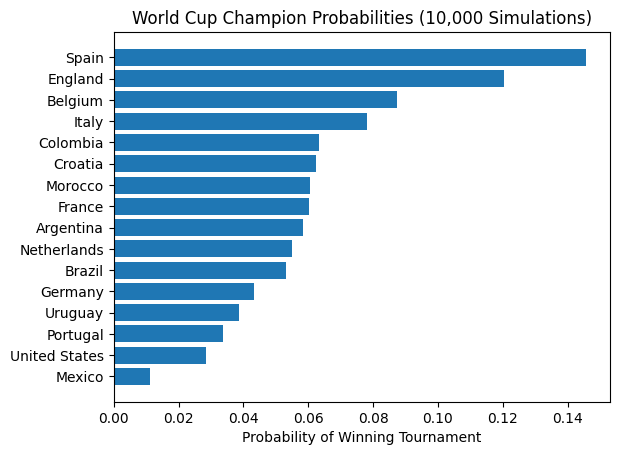

In [24]:
teams = list(champion_probs.keys())
probs = list(champion_probs.values())

plt.figure()
plt.barh(teams, probs)
plt.xlabel("Probability of Winning Tournament")
plt.title("World Cup Champion Probabilities (10,000 Simulations)")
plt.gca().invert_yaxis()
plt.show()

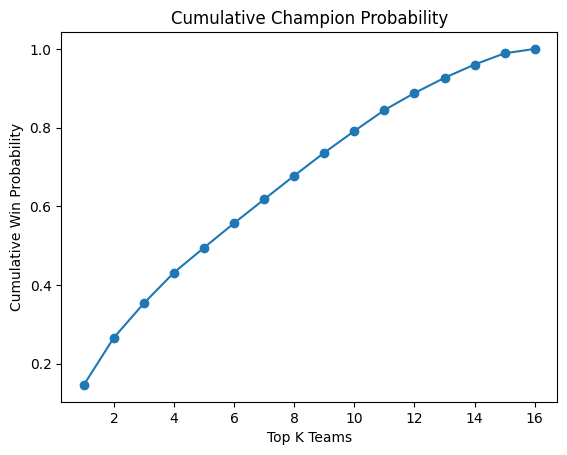

In [26]:
sorted_probs = np.array(sorted(probs, reverse=True))
cum_probs = np.cumsum(sorted_probs)

plt.figure()
plt.plot(range(1, len(cum_probs) + 1), cum_probs, marker='o')
plt.xlabel("Top K Teams")
plt.ylabel("Cumulative Win Probability")
plt.title("Cumulative Champion Probability")
plt.show()